In [ ]:
!pip install datasets
from datasets import load_dataset
ds = load_dataset("scikit-learn/Fish")
ds

DatasetDict({
    train: Dataset({
        features: ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],
        num_rows: 159
    })
})

In [ ]:
from datasets import load_dataset
ds = load_dataset("scikit-learn/Fish")
ds

DatasetDict({
    train: Dataset({
        features: ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],
        num_rows: 159
    })
})

In [ ]:
# Convert to a DataFrame
import pandas as pd
df = pd.DataFrame(ds['train'])

# Check for missing data and handle it
print(df.isnull().sum())

#One-hot encode the 'Species' column before dropping if needed
df = pd.get_dummies(df, columns=['Species'], drop_first=True) # Moved before drop

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [ ]:
# Separate features and target
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]  # Features
y = df['Weight']  # Target variable

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
#this Step is necessary for equal distribution of datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


<Axes: xlabel='Height', ylabel='Weight'>

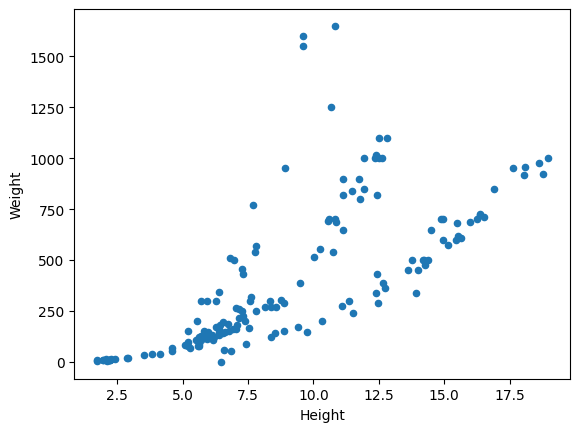

In [ ]:
df.plot(kind='scatter', x='Height', y='Weight')

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 4532.080767499994
Mean Absolute Error: 44.67993749999999
R-squared: 0.9681376301279729


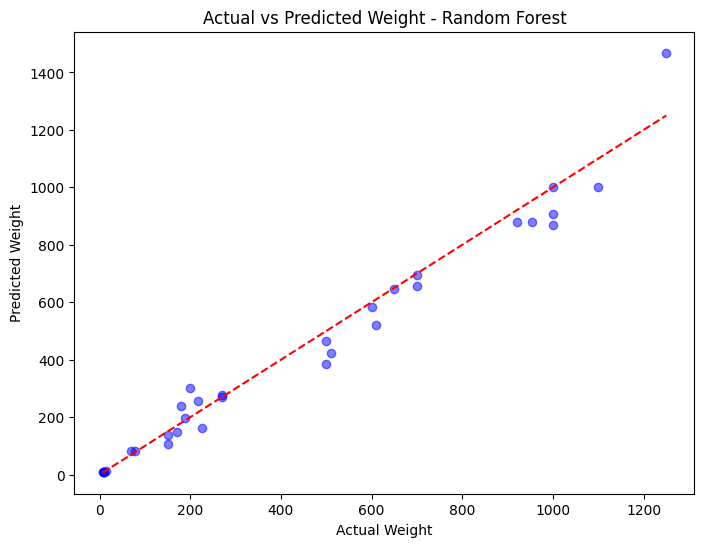

In [ ]:
# Plotting Actual vs Predicted values (Scatter Plot)
import matplotlib.pyplot as plt # Importing the necessary library

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight - Random Forest')
plt.show()

In [ ]:
new_data=pd.DataFrame({
    "Length1" :[30],
    "Length2":[25],
    "Length3" :[35],
    "Height" :[12],
    "Width" :[8],
    "Specie" :["Perch"]
    })
new_data=pd.get_dummies(new_data,columns=["Species"],drop_first=True)
training_columns=X_train.columns
new_data=new_data.reindex(columns=training_columns,fil_value=0)
predicted_weight=rf_model.predict(new_data)
print(f"Predicted Weight:{predicted_weight[0]:.2f}grams")



NameError: name 'pd' is not defined